# Chapter Goals
- Diagnosing input issues.

# General Guidelines
- Tinkering with examples by tuning their code, Gaining more familiarity and intuition.
- Visualizing input representations.

---

# Modules & Datasets Setup

In [ ]:
# @title
!apt-get install default-jdk
!apt install libgraphviz-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jdk-headless default-jre default-jre-headless fonts-dejavu-core
  fonts-dejavu-extra libatk-wrapper-java libatk-wrapper-java-jni libfontenc1
  libice-dev libsm-dev libxkbfile1 libxt-dev libxtst6 libxxf86dga1
  openjdk-11-jdk openjdk-11-jre x11-utils
Suggested packages:
  libice-doc libsm-doc libxt-doc openjdk-11-demo openjdk-11-source visualvm
  mesa-utils
The following NEW packages will be installed:
  default-jdk default-jdk-headless default-jre default-jre-headless
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libice-dev libsm-dev libxkbfile1
  libxt-dev libxtst6 libxxf86dga1 openjdk-11-jdk openjdk-11-jre x11-utils
0 upgraded, 18 newly installed, 0 to remove and 18 not upgraded.
Need to get 5,518 kB of archives.
After this operation, 15.8 MB of additional disk space will be u

In [ ]:
# @title
!pip install pygraphviz
!pip install python-javabridge
!pip install python-weka-wrapper3
!pip install sklearn-weka-plugin

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.8/120.8 kB 3.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pygraphviz: filename=pygraphviz-1.11-cp310-cp310-linux_x86_64.whl size=175923 sha256=e9e590f2cd5a049d9f9aba02b52073b0366984b2b96dd235953d534c5b5147de
  Stored in directory: /root/.cache/pip/wheels/5b/ee/36/f47a0d35664fbe1a2b5a433ae33c6ad636b00bb231f68a9aaa
Successfully built pygraphviz
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for python-javabridge: filename=python_javabridge-4.0.3-cp310-cp310-linux_x86_64.whl size=1743154 sha256=c5c5a87058412c3257b3d323435e41d6c062576ded08b0c0f2c1e491c6425ad5
  Stored in directory: /root/.cache/pip/wheels/35/58/be/c5d71b71a9dd6585f897fa5b2d021e03962eb30d6b20797396
Successfully built python-javabridge
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 13.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done

In [ ]:
# @title
#Restart runtime after installing the dependencies

In [ ]:
# @title
import os
import glob
import numpy as np
import pandas as pd
import weka.core.jvm as jvm
from weka.core import converters
import matplotlib.pyplot as plt

In [ ]:
# @title
data_dir = 'data'

In [ ]:
# @title
#!rm -r weka
#!rm -r data

In [ ]:
# @title
#jvm.stop()
jvm.start(packages=True)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['/usr/local/lib/python3.10/dist-packages/javabridge/jars/rhino-1.7R4.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/runnablequeue.jar', '/usr/local/lib/python3.10/dist-packages/javabridge/jars/cpython.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/mtj.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/core.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/weka.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/arpack_combined.jar', '/usr/local/lib/python3.10/dist-packages/weka/lib/python-weka-wrapper.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


In [ ]:
# @title
# Preparing Datasets
if not os.path.exists(data_dir):
    !mkdir $data_dir
    for file in ['airline.arff', 'breast-cancer.arff', 'contact-lenses.arff', 'cpu.arff', 'cpu.with.vendor.arff', 'credit-g.arff', 'diabetes.arff', 'glass.arff', 'hypothyroid.arff', 'ionosphere.arff', 'iris.2D.arff', 'iris.arff', 'labor.arff', 'segment-challenge.arff', 'segment-test.arff', 'soybean.arff', 'supermarket.arff', 'unbalanced.arff', 'vote.arff', 'weather.nominal.arff', 'weather.numeric.arff',]:
        url = 'https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/' + file
        !wget -P $data_dir $url
    loader = converters.Loader(classname="weka.core.converters.ArffLoader")
    saver = converters.Saver(classname="weka.core.converters.CSVSaver")
    for file in glob.glob(os.path.join(data_dir, '*.arff')):
        dataset = loader.load_file(file)
        filename, file_extension = os.path.splitext(file)
        saver.save_file(dataset, filename + '.csv')
    !wget -P $data_dir https://raw.githubusercontent.com/Rytuo/ITMO-CT/master/Others/AdvancedML/data/OpenML/data/1438.arff
    !rm -r weka

--2023-09-29 11:53:24--  https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/airline.arff
Resolving git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)... 130.217.218.43
Connecting to git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)|130.217.218.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2357 (2.3K) [text/plain]
Saving to: ‘data/airline.arff’

airline.arff        100%[===================>]   2.30K  --.-KB/s    in 0s      

2023-09-29 11:53:26 (1.18 GB/s) - ‘data/airline.arff’ saved [2357/2357]

--2023-09-29 11:53:26--  https://git.cms.waikato.ac.nz/weka/weka/-/raw/main/trunk/wekadocs/data/breast-cancer.arff
Resolving git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)... 130.217.218.43
Connecting to git.cms.waikato.ac.nz (git.cms.waikato.ac.nz)|130.217.218.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29418 (29K) [text/plain]
Saving to: ‘data/breast-cancer.arff’

breast-cancer.arff  100%[===================>]  28.73K  

# 2.1 What’s a Concept?

In [ ]:
from sklearn.utils import all_estimators
for typeFilter in ['classifier', 'regressor', 'cluster', 'transformer']:
    print(typeFilter)
    for estimatorName, estimatorClass in all_estimators(type_filter=typeFilter):
        print('\t', estimatorName)

In [ ]:
for i in pkgutil.iter_modules(path=weka.__path__,prefix="weka.classifiers."):
 print(i.name)

weka.classifiers.associations
weka.classifiers.attribute_selection
weka.classifiers.classifiers
weka.classifiers.clusterers
weka.classifiers.core
weka.classifiers.datagenerators
weka.classifiers.experiments
weka.classifiers.filters
weka.classifiers.flow
weka.classifiers.plot
weka.classifiers.timeseries


In [ ]:
import weka.core.packages as packages
for module in ['classifiers', 'clusterers', 'associations']:
    print(module)
    for suggestion in packages.suggest_package('weka.' + module):
        print('\t', suggestion)

classifiers
	 alternatingDecisionTrees
	 alternatingModelTrees
	 averagedOneDependenceEstimators
	 bayesianLogisticRegression
	 bestFirstTree
	 citationKNN
	 classAssociationRules
	 classificationViaClustering
	 clojureClassifier
	 complementNaiveBayes
	 conjunctiveRule
	 dagging
	 decorate
	 discriminantAnalysis
	 distributedWekaBase
	 distributedWekaSparkDev
	 DMNBtext
	 DTNB
	 dualPerturbAndCombine
	 elasticNet
	 ensembleLibrary
	 ensemblesOfNestedDichotomies
	 extraTrees
	 functionalTrees
	 fuzzyLaticeReasoning
	 fuzzyUnorderedRuleInduction
	 grading
	 gridSearch
	 hiddenNaiveBayes
	 hyperPipes
	 isolationForest
	 isotonicRegression
	 iterativeAbsoluteErrorRegression
	 J48graft
	 kerasZoo
	 kernelLogisticRegression
	 largeScaleKernelLearning
	 lazyBayesianRules
	 leastMedSquared
	 LibLINEAR
	 LibSVM
	 localOutlierFactor
	 logarithmicErrorMetrics
	 massiveOnlineAnalysis
	 metaCost
	 multiBoostAB
	 multiInstanceLearning
	 multilayerPerceptronCS
	 multiLayerPerceptrons
	 naiveBayesTre

# 2.2 What’s in an Example?

In [ ]:
df = pd.read_csv("data/weather.numeric.csv")
df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


**Task 2.2.1** Show the instance with highest temperature.

## Relations

In [ ]:
df = pd.DataFrame(
    [
      ["Peter","Male","?","?"],
      ["Peggy","Female","?","?"],
      ["Steven","Male","Peter","Peggy"],
      ["Graham","Male","Peter","Peggy"],
      ["Pam","Female","Peter","Peggy"],
      ["Ian","Male","Grace","Ray"]
    ],

    columns = ["Name", "Gender", "Parent1", "Parent2"]
)

df

,Name,Gender,Parent1,Parent2
0,Peter,Male,?,?
1,Peggy,Female,?,?
2,Steven,Male,Peter,Peggy
3,Graham,Male,Peter,Peggy
4,Pam,Female,Peter,Peggy
5,Ian,Male,Grace,Ray


**Task 2.2.2** Who is the parent of _Steven_?

**Task 2.2.3** Modify the dataframe so that _Peter_ has children more than _Peggy_.

## Other Example Types

In [ ]:
loader = converters.Loader(classname="weka.core.converters.ArffLoader")
dataset = loader.load_file("data/1438.arff")
print(dataset)

@relation accelerometer

@attribute id {'?'}
@attribute bag relational
@attribute y numeric
@attribute x numeric
@attribute z numeric
@end bag
@attribute class {walking,running,standing,'?'}

@data
?,'0.392035,-0.145497,9.850266\n0.489183,-0.286804,9.984836\n0.427212,-0.273332,9.95924\n0.676144,-0.286055,10.198592\n0.796494,-0.182021,9.773476\n0.727787,-0.189955,9.761351\n0.87538,-0.468226,9.888437\n0.571062,-0.402214,10.228979\n0.817899,-0.422571,9.79099\n0.752785,-0.343685,9.985884\n0.714764,-0.302072,9.854158\n0.793201,-0.300276,9.914333\n0.78392,-0.404758,10.169552\n0.768352,-0.248932,10.239158\n1.783092,-0.515977,9.588311\n2.439327,-0.407453,9.943672\n3.572471,-0.169298,9.000483\n4.120481,-0.438139,9.193432\n4.266428,-0.424817,9.113049\n4.453689,-0.412542,8.93956\n4.224665,-0.250729,8.827294\n4.205654,-0.234862,9.073531\n4.17392,-0.268841,8.940159\n4.040997,-0.444276,9.023835\n3.716172,-0.164508,9.269025',standing
?,'9.597592,0.281564,2.32766\n9.59355,0.172292,2.181563\n9.676029,0

#2.3 What’s in an Attribute?

In [ ]:
df = pd.read_csv("data/weather.numeric.csv")
df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [ ]:
# All unique values of some feature
df["outlook"].unique()

<StringArray>
['sunny', 'overcast', 'rainy']
Length: 3, dtype: string

In [ ]:
# Counts of all unique values of some feature
df[ ["outlook"] ].value_counts()

outlook 
rainy       5
sunny       5
overcast    4
dtype: int64

<Axes: xlabel='outlook'>

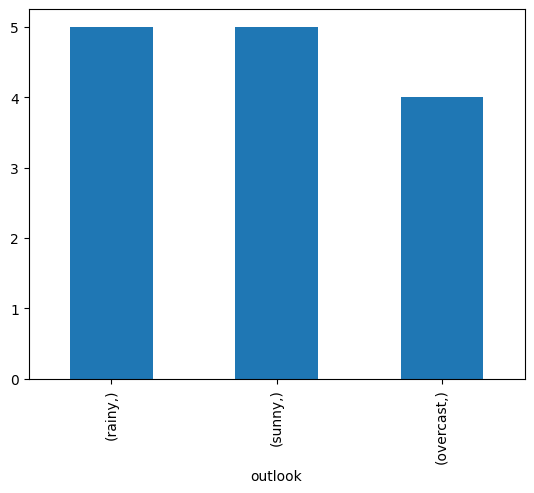

In [ ]:
# Visualizing counts
df[ ["outlook"] ].value_counts().plot.bar()

<Axes: ylabel='Frequency'>

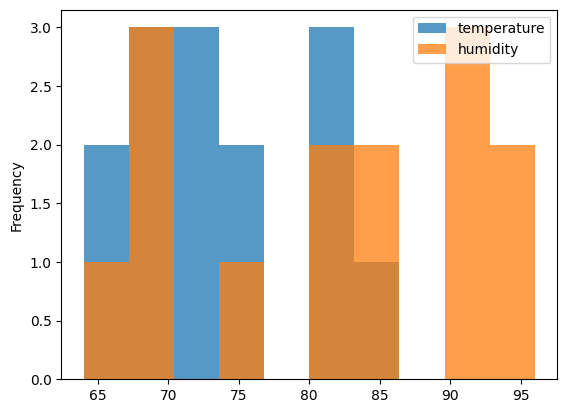

In [ ]:
# Histogram
df[ ["temperature", "humidity"] ].plot.hist(alpha=0.75)

**Task 2.3.1** Visualize other features using the same methods

**Challenge 2.3.2** How can we visualize the correlation between more than 2 variables?

# 2.4 Preparing the Input

## Gathering the Data Together

### Create dataset manually

In [ ]:
from weka.core.dataset import Attribute, Instance, Instances

# create attributes
num_att = Attribute.create_numeric("num")
date_att = Attribute.create_date("dat", "yyyy-MM-dd")
nom_att = Attribute.create_nominal("nom", ["label1", "label2"])

# create dataset
dataset = Instances.create_instances("helloworld", [num_att, date_att, nom_att], 0)

# add rows
values = [3.1415926, date_att.parse_date("2014-04-10"), 1.0]
inst = Instance.create_instance(values)
dataset.add_instance(inst)

values = [2.71828, date_att.parse_date("2014-08-09"), Instance.missing_value()]
inst = Instance.create_instance(values)
dataset.add_instance(inst)

print(dataset)

@relation helloworld

@attribute num numeric
@attribute dat date yyyy-MM-dd
@attribute nom {label1,label2}

@data
3.141593,2014-04-10,label2
2.71828,2014-08-09,?


### Create dataset from lists

In [ ]:
from weka.core.dataset import create_instances_from_lists
from random import randint

# pure numeric
x = [[randint(1, 10) for _ in range(5)] for _ in range(10)]
y = [randint(0, 1) for _ in range(10)]
dataset = create_instances_from_lists(x, y, name="generated from lists")
print(dataset)

@relation 'generated from lists'

@attribute x1 numeric
@attribute x2 numeric
@attribute x3 numeric
@attribute x4 numeric
@attribute x5 numeric
@attribute y numeric

@data
10,4,9,6,7,1
4,1,5,5,4,1
5,5,9,3,1,0
1,10,10,8,4,1
8,10,7,4,6,1
8,2,8,5,8,1
7,6,3,10,2,1
10,10,9,3,1,0
2,4,6,3,3,1
4,4,10,3,2,0


In [ ]:
dataset = create_instances_from_lists(x, name="generated from lists (no y)")
print(dataset)

@relation 'generated from lists (no y)'

@attribute x1 numeric
@attribute x2 numeric
@attribute x3 numeric
@attribute x4 numeric
@attribute x5 numeric

@data
10,4,9,6,7
4,1,5,5,4
5,5,9,3,1
1,10,10,8,4
8,10,7,4,6
8,2,8,5,8
7,6,3,10,2
10,10,9,3,1
2,4,6,3,3
4,4,10,3,2


In [ ]:
# mixed data types
x = [["TEXT", 1, 1.1], ["XXX", 2, 2.2]]
y = ["A", "B"]
dataset = create_instances_from_lists(x, y, name="generated from mixed lists", cols_x=["text", "integer", "float"], col_y="class")
print(dataset)

@relation 'generated from mixed lists'

@attribute text string
@attribute integer numeric
@attribute float numeric
@attribute class string

@data
TEXT,1,1.1,A
XXX,2,2.2,B


###Create dataset from matrices

In [ ]:
from weka.core.dataset import create_instances_from_matrices
import numpy as np

# pure numeric
x = np.random.randn(10, 5)
y = np.random.randn(10)
dataset = create_instances_from_matrices(x, y, name="generated from matrices")
print(dataset)

@relation 'generated from matrices'

@attribute x1 numeric
@attribute x2 numeric
@attribute x3 numeric
@attribute x4 numeric
@attribute x5 numeric
@attribute y numeric

@data
0.629392,-0.09832,-0.422484,-0.169946,0.05149,-0.692909
-0.541271,1.009759,1.631953,3.368145,1.303312,0.776066
-0.179628,0.003113,1.915605,-2.529908,-0.943525,-0.352515
-1.013789,-0.943359,-0.129905,0.696045,0.975933,0.538208
0.818717,0.894472,1.063312,1.547528,1.483321,-1.277839
0.751582,0.009669,-0.596318,1.299259,0.524294,2.876909
-0.286807,-1.020932,-0.351447,-1.774938,-1.131307,0.553186
-2.112942,-0.15905,0.647894,-2.249435,-0.046986,0.596745
-0.308123,-1.472949,0.364102,-1.161712,0.585897,1.148289
-1.156549,0.491881,-0.832956,-1.214837,0.791667,-1.662772


In [ ]:
dataset = create_instances_from_matrices(x, name="generated from matrix (no y)")
print(dataset)

@relation 'generated from matrix (no y)'

@attribute x1 numeric
@attribute x2 numeric
@attribute x3 numeric
@attribute x4 numeric
@attribute x5 numeric

@data
0.629392,-0.09832,-0.422484,-0.169946,0.05149
-0.541271,1.009759,1.631953,3.368145,1.303312
-0.179628,0.003113,1.915605,-2.529908,-0.943525
-1.013789,-0.943359,-0.129905,0.696045,0.975933
0.818717,0.894472,1.063312,1.547528,1.483321
0.751582,0.009669,-0.596318,1.299259,0.524294
-0.286807,-1.020932,-0.351447,-1.774938,-1.131307
-2.112942,-0.15905,0.647894,-2.249435,-0.046986
-0.308123,-1.472949,0.364102,-1.161712,0.585897
-1.156549,0.491881,-0.832956,-1.214837,0.791667


In [ ]:
# mixed data types
x = np.array([("TEXT", 1, 1.1), ("XXX", 2, 2.2)], dtype='S20, i4, f8')
y = np.array(["A", "B"], dtype='S20')
dataset = create_instances_from_matrices(x, y, name="generated from mixed matrices", cols_x=["text", "integer", "float"], col_y="class")
print(dataset)

@relation 'generated from mixed matrices'

@attribute text string
@attribute integer numeric
@attribute float numeric
@attribute class string

@data
TEXT,1,1.1,A
XXX,2,2.2,B


**Task 2.4.1** Create new datasets with different attribute types and rows entries, and display the dataset schema.

##Attribute Types

In [ ]:
df = pd.read_csv("data/weather.numeric.csv")
df

,outlook,temperature,humidity,windy,play
0,sunny,85,85,False,no
1,sunny,80,90,True,no
2,overcast,83,86,False,yes
3,rainy,70,96,False,yes
4,rainy,68,80,False,yes
5,rainy,65,70,True,no
6,overcast,64,65,True,yes
7,sunny,72,95,False,no
8,sunny,69,70,False,yes
9,rainy,75,80,False,yes


In [ ]:
# Show data types
df.dtypes

outlook        object
temperature     int64
humidity        int64
windy            bool
play           object
dtype: object

In [ ]:
# Modify outlook column to be a string data type
df["outlook"] = df["outlook"].astype("string")

**Task 2.3.1** Modify _play_ column data type to be boolean.

In [ ]:
dataset = pd.read_csv(os.path.join(data_dir, 'labor.csv'))
display(dataset)

,duration,wage-increase-first-year,wage-increase-second-year,wage-increase-third-year,cost-of-living-adjustment,working-hours,pension,standby-pay,shift-differential,education-allowance,statutory-holidays,vacation,longterm-disability-assistance,contribution-to-dental-plan,bereavement-assistance,contribution-to-health-plan,class
0,1,5,?,?,?,40,?,?,2,?,11,average,?,?,yes,?,good
1,2,4.5,5.8,?,?,35,ret_allw,?,?,yes,11,below_average,?,full,?,full,good
2,?,?,?,?,?,38,empl_contr,?,5,?,11,generous,yes,half,yes,half,good
3,3,3.7,4,5,tc,?,?,?,?,yes,?,?,?,?,yes,?,good
4,3,4.5,4.5,5,?,40,?,?,?,?,12,average,?,half,yes,half,good
5,2,2,2.5,?,?,35,?,?,6,yes,12,average,?,?,?,?,good
6,3,4,5,5,tc,?,empl_contr,?,?,?,12,generous,yes,none,yes,half,good
7,3,6.9,4.8,2.3,?,40,?,?,3,?,12,below_average,?,?,?,?,good
8,2,3,7,?,?,38,?,12,25,yes,11,below_average,yes,half,yes,?,good
9,1,5.7,?,?,none,40,empl_contr,?,4,?,11,generous,yes,full,?,?,good


## Sparse Dataframe & Missing Values

In [ ]:
df = pd.read_csv("data/supermarket.csv")

# replace each "?" entry with Null
df = df.applymap(lambda x: np.NaN if x == "?" else x)

df

,department1,department2,department3,department4,department5,department6,department7,department8,department9,'grocery misc',...,department208,department209,department210,department211,department212,department213,department214,department215,department216,total
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high
1,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
3,t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4623,NaN,NaN,NaN,t,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,high
4624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low
4625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,low


**Task 2.4.2** Give two special observations in the dataframe above.

**Answer**

In [ ]:
# Map each column to a new column of total True and False counts
df.isnull().apply(
    lambda col: col.value_counts()
)

,department1,department2,department3,department4,department5,department6,department7,department8,department9,'grocery misc',...,department208,department209,department210,department211,department212,department213,department214,department215,department216,total
False,1047,131,90,84,175,2,67,NaN,82,178,...,NaN,NaN,191,207,38,22,NaN,NaN,NaN,4627.0
True,3580,4496,4537,4543,4452,4625,4560,4627.0,4545,4449,...,4627.0,4627.0,4436,4420,4589,4605,4627.0,4627.0,4627.0,NaN


**Task 2.4.3** Compute a new column counting the total sum along all _department_ columns.

**Task 2.4.4** Visualize the total sum to confirm your intuitive guess of in _task 2.4.2_.

**Challenge 2.4.5** Explore methods of dimesionality reduction and its role in learning from data.

##Inaccurate Values

array([[<Axes: title={'center': 'MYCT'}>,
        <Axes: title={'center': 'MMIN'}>,
        <Axes: title={'center': 'MMAX'}>,
        <Axes: title={'center': 'CACH'}>],
       [<Axes: title={'center': 'CHMIN'}>,
        <Axes: title={'center': 'CHMAX'}>,
        <Axes: title={'center': 'class'}>, <Axes: >]], dtype=object)

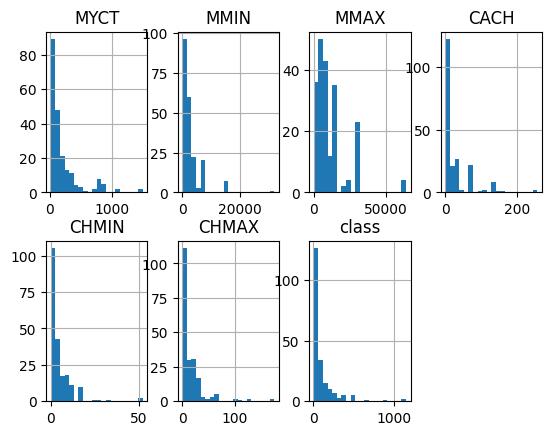

In [ ]:
dataset = pd.read_csv(os.path.join(data_dir, 'cpu.csv'))
dataset.hist(layout=(2,4), bins=20)

##Unbalanced Data

In [ ]:
df = pd.read_csv("data/unbalanced.csv")

<Axes: >

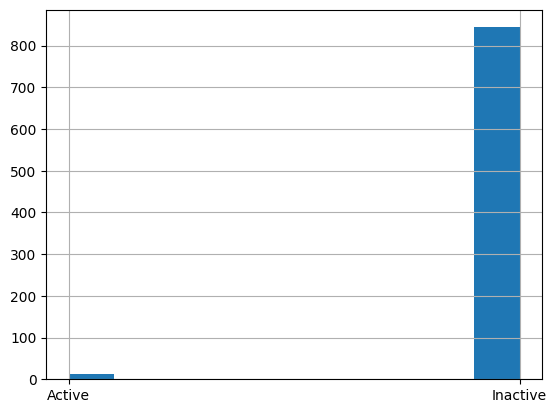

In [ ]:
df.iloc[:, -1].hist()

**Challenge 2.4.6** Explore why is imbalanced data an issue, and how to overcome it by imposing a penalty.

**Challenge 2.4.7** The imbalance was shown on _active-inactive_ class. What if a similar graph was found on a feature. Do we consider the data imbalanced in that case? Why?

# Project. Phase 2
- Data exploration
- Data cleansing
- Data engineering